# <u>SpeakX Assignment</u>
#### Predicting Customer Churn in a Telecommunication Company

In [23]:
# Install the necessary libraries.
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
# Import the installed libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### 1. Data Collection and Loading

The data is loaded from the given Kaggle Link <u><a href = "https://www.kaggle.com/datasets/blastchar/telcocustomer-churn"> https://www.kaggle.com/datasets/blastchar/telcocustomer-churn</a></u> so that I can proceed with the further steps.

In [25]:
# Stored from .csv file in pandas dataframe.
data= pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [26]:
# Information regarding the dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [27]:
# Summary Statistics of the dataset.
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### 2. Data Preprocessing

• Converted the wrong type of numerical column to numeric.<br>
• Dropped the unwanted and useless columns.<br>
• Encoded the categorical columns to numeric to make fir for models.<br>

<u>Note</u>: After encoding multiple categories column,the number of column increased from 21 to 41.

In [28]:
# Converted 'TotalCharges' to numeric.
data['TotalCharges']= pd.to_numeric(data['TotalCharges'],errors='coerce')

# Handled missing values by replacing with the mean of the column.
data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)

# Dropped the 'customerID' column.
data.drop('customerID',axis=1,inplace=True)

# Encoded binary categorical variables.
binary_columns = ['gender','Partner','Dependents','PhoneService','PaperlessBilling','Churn']
for col in binary_columns:
    data[col] = data[col].apply(lambda x: 1 if x == 'Yes' or x == 'Male' else 0)

# Encoded non-binary categorical variables using one-hot encoding.
dataset = pd.get_dummies(data)

# Displayed the first few rows of the preprocessed dataset.
print(dataset.head())


   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0                 1           29.85         29.85      0  ...   
1                 0           56.95       1889.50      0  ...   
2                 1           53.85        108.15      1  ...   
3                 0           42.30       1840.75      0  ...   
4                 1           70.70        151.65      1  ...   

   StreamingMovies_No  StreamingMovies_No internet service  \
0                True                                False   
1                True                                False

C:\Users\SANJANA\AppData\Local\Temp\ipykernel_25252\1261760103.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)


In [29]:
# List of newly created boolean columns.
boolean_columns = ['MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes',
                   'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No',
                   'OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
                   'OnlineBackup_No', 'OnlineBackup_No internet service', 'OnlineBackup_Yes',
                   'DeviceProtection_No', 'DeviceProtection_No internet service', 'DeviceProtection_Yes',
                   'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
                   'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
                   'StreamingMovies_No', 'StreamingMovies_No internet service', 'StreamingMovies_Yes',
                   'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
                   'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)',
                   'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

# Converted boolean columns to integers.
dataset[boolean_columns] = dataset[boolean_columns].astype(int)


In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   PaperlessBilling                         7043 non-null   int64  
 7   MonthlyCharges                           7043 non-null   float64
 8   TotalCharges                             7043 non-null   float64
 9   Churn                                    7043 non-null   int64  
 10  MultipleLines_No                         7043 no

In [31]:
# See the updated dataset
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


### 3. Exploratory Data Analysis (EDA)

EDA is performed to gain insights from the dataset initially.

• The number of 'Churned' and 'Not Churned' customers are identified from the dataset. <br>
• It's clearly visible that the dataset is imbalanced as the number of 'Not Churned' customers are high (approx. 75%) due to which 'Churned' customers characteristics are less.

Churn
0    5174
1    1869
Name: count, dtype: int64


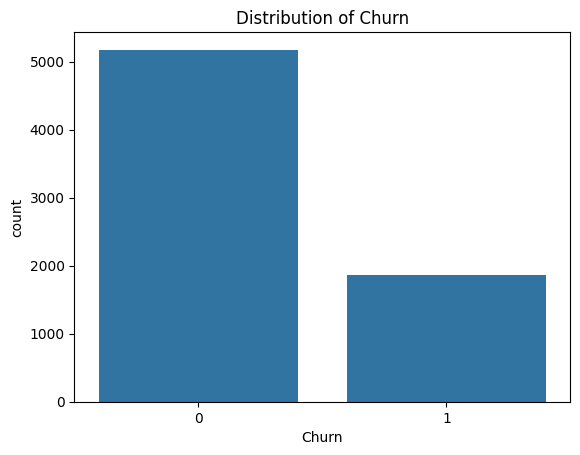

In [32]:
print(dataset['Churn'].value_counts())

# Distribution of churned vs non-churned customers.
sns.countplot(x='Churn', data=dataset)
plt.title('Distribution of Churn')
plt.show()

In univariate analysis, 3 numeric columns were analysed.
 
<u>Observation</u><br>

• The distribution for tenure is close to multimodal. It could indicates that customers have varying lengths of association with the telecom company.This could imply diverse customer segments with different levels of loyalty.<br>

• The distribution of monthly charges,after the initial bars,approximates a normal distribution pattern.This indicates that most customers are charged around a central average amount.<br>

• The  distribution of total charges is positively skewed highlights that while most customers incur lower charges,a smaller group accounts for higher charges.


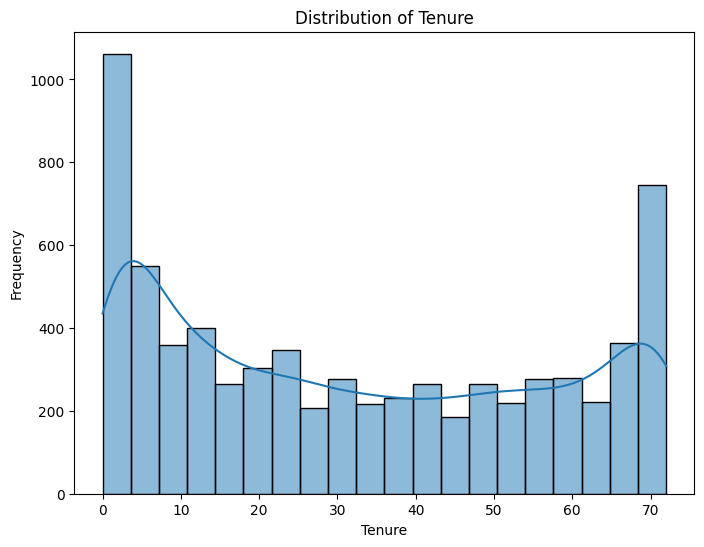

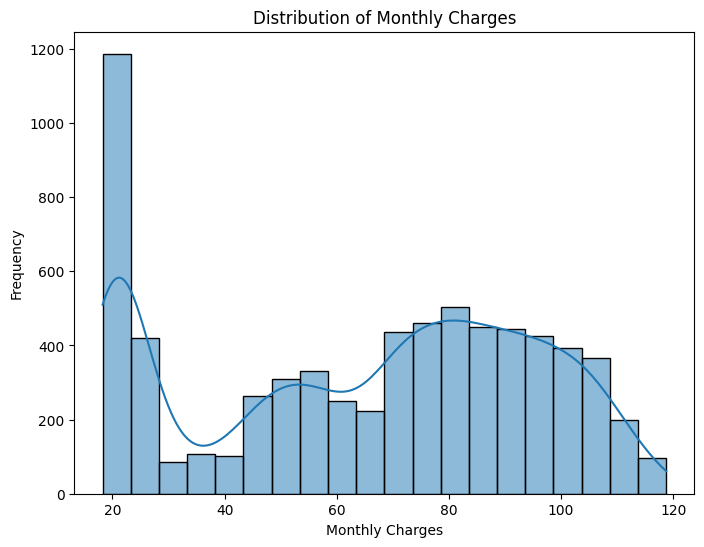

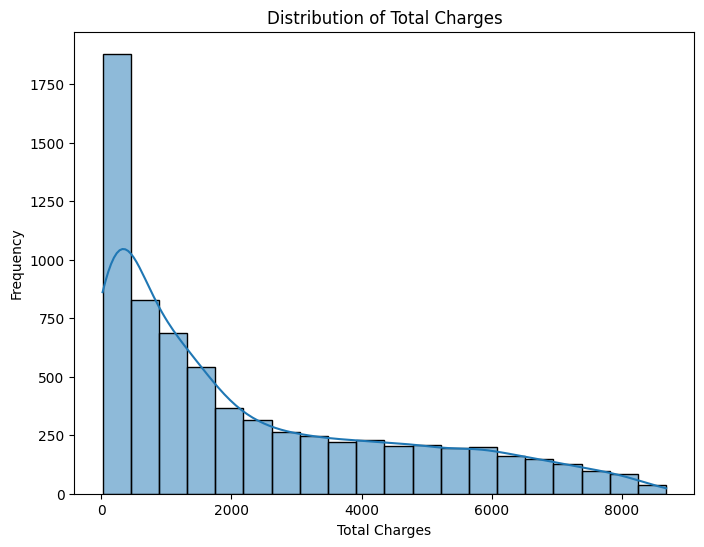

In [33]:
# Univariate analysis: Histogram of tenure,monthly charges and total charges is plotted.
plt.figure(figsize=(8, 6))
sns.histplot(dataset['tenure'], bins=20, kde=True)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(dataset['MonthlyCharges'], bins=20, kde=True)
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(dataset['TotalCharges'], bins=20, kde=True)
plt.title('Distribution of Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.show()

In bivariate analysis, 3 numeric columns were analysed.
 
<u>Observation</u><br>

• The boxplot for tenure identifies certain small outliers which are greater than the upper fence. Also the median tenure for 'Churned' customers is very less depicting they are much likely to churn.<br>

• The median monthly charges as well as minimum value is less for 'Not Churned' customers depicting they are less likely to churn.<br>

• The total charges column is showing outliers mostly due to the large scale values.

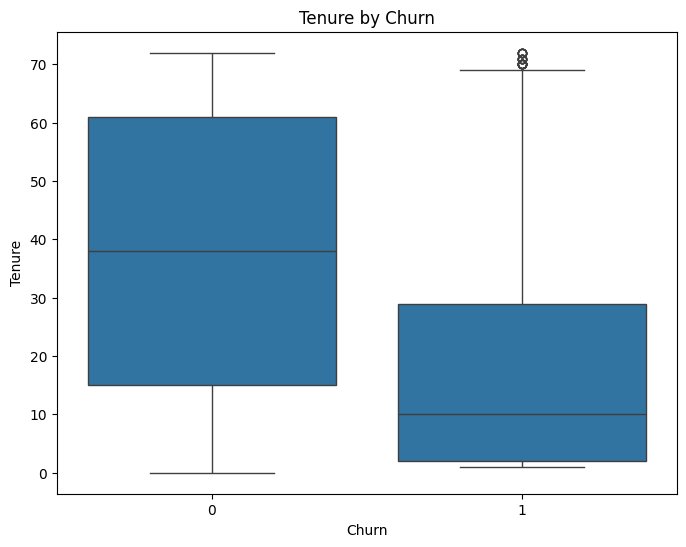

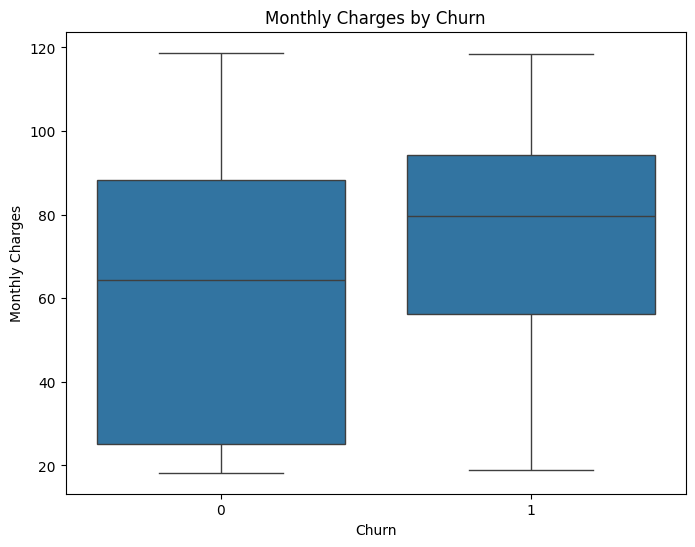

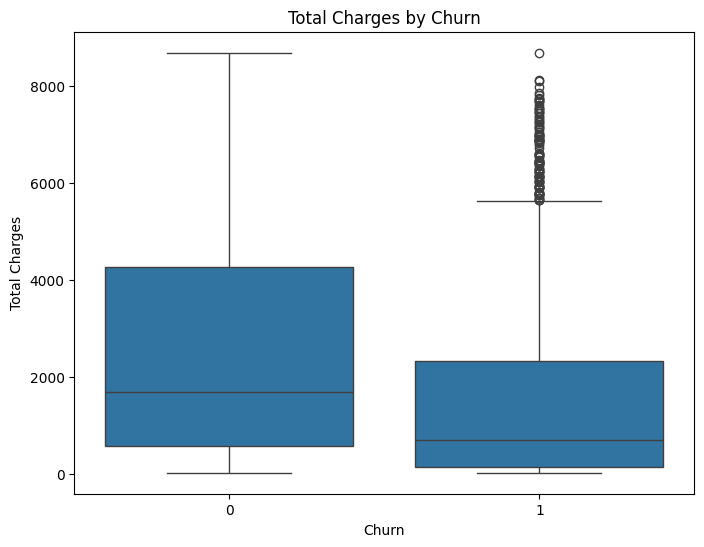

In [34]:
# Bivariate analysis: Box plot of tenure,monthly_charges and total_charges by Churn.
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='tenure', data=dataset)
plt.title('Tenure by Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=dataset)
plt.title('Monthly Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='TotalCharges', data=dataset)
plt.title('Total Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Total Charges')
plt.show()

• In multivariate analysis, all columns were analysed using heatmap which is nothing but visual version of correlation matrix.

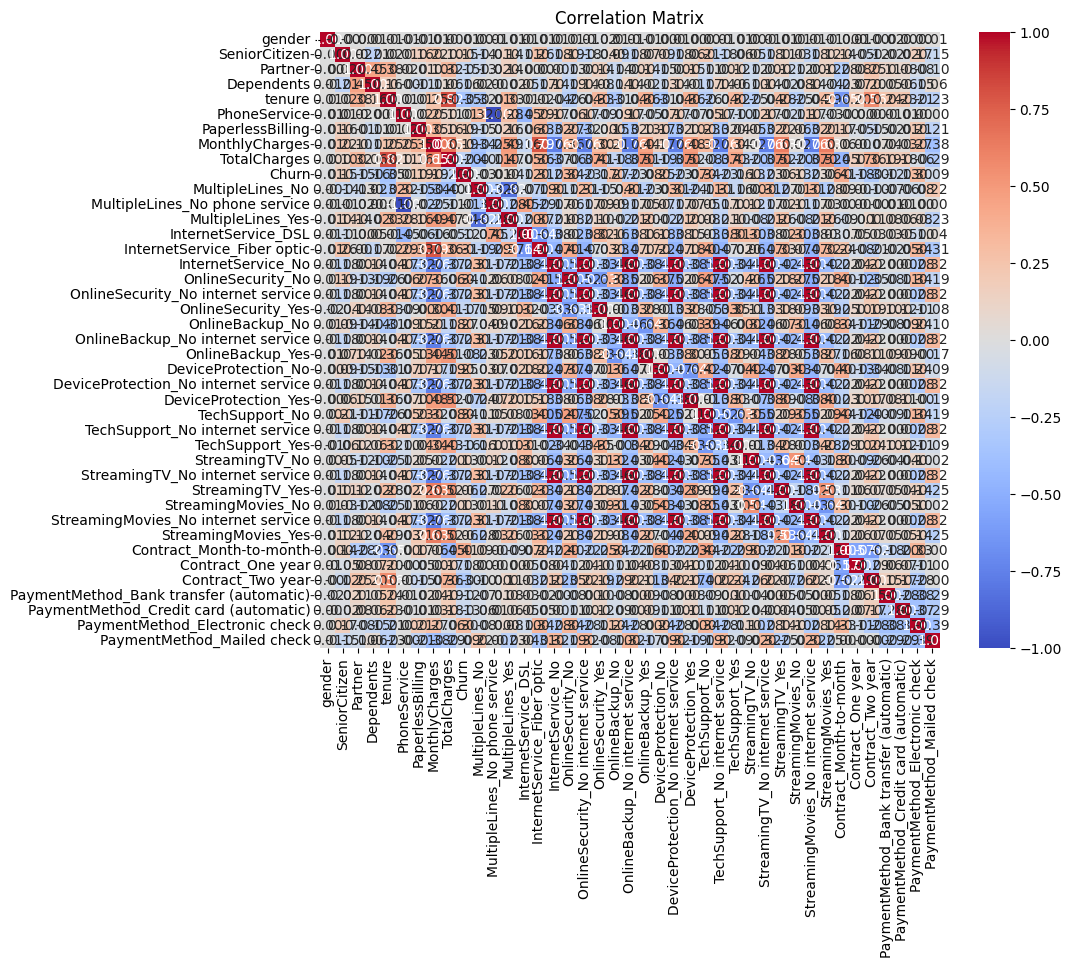

In [35]:
# Heatmap of correlation matrix.
plt.figure(figsize=(10, 8))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

<u>Many other insights were drawn from different graphs</u> - 

• Gender-wise proportion of customers is almost same for the company.<br>
• Female customers churned more than men but on very slight margin.<br>
• Company's customer domain include only around 15% as senior citizens and in which nearly 50% churned.<br>
• Around 75% of non-senior citizens stick with the company.<br>
• The number of such customers are more who are living as partners.<br>
• Among customers who were living with their partners, 70% were happy with the services of company which is more in comparison to the customers not living with partners.<br>
• There are only around 30% of customers who have dependants and out of those nearly 82% stick to the services provide by the telecom company.<br>
• Around 90% of the customers have opted for the phone service and out of those 25% were at the risk of churning.<br>
• At the same time around 90% percent of customers are retaining with the company if they haven't opted for phone service.<br>
• The churn count is more in customers who have access to paperless billing than compared to those who have not. The main reason could be that paperless billing slightly imposes that the customer is more more advanced and might be using internet more where he/she could be available to other rival telecom company services.<br>
• Churning rate is very less in customers whose payment method is set to automatic either by bank or by credit card.<br>
• Churning rate is observed high in customers with month-to-month subscription that to 1 year or 2 year subscription. The reason behind it could be that those customers who have long term subsription might have made contract and made payment at a single go. Therefore their churning rate is less.<br><br>

<i>Note : There could more visualizations that could be extracted but I am limiting myself to here.</i>


<Figure size 1000x500 with 0 Axes>

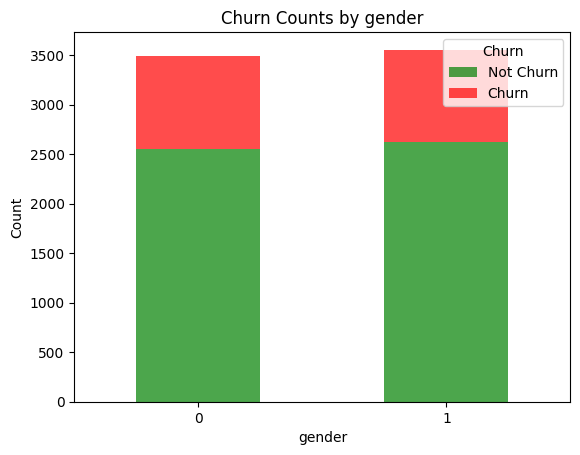

<Figure size 1000x500 with 0 Axes>

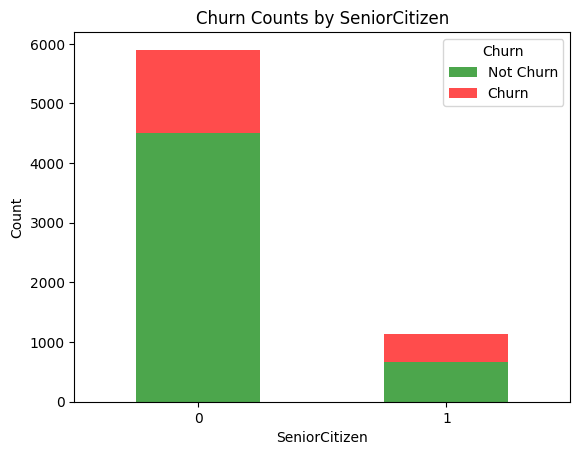

<Figure size 1000x500 with 0 Axes>

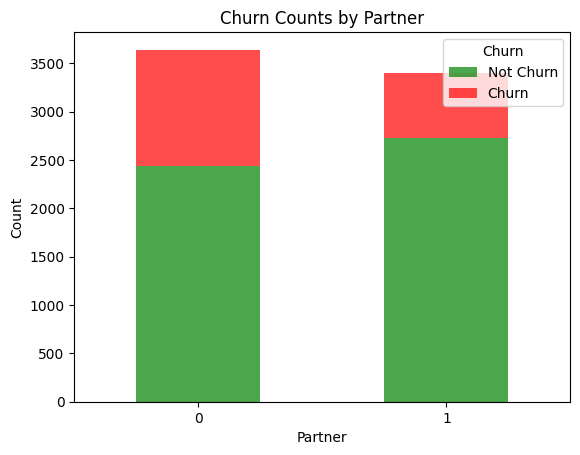

<Figure size 1000x500 with 0 Axes>

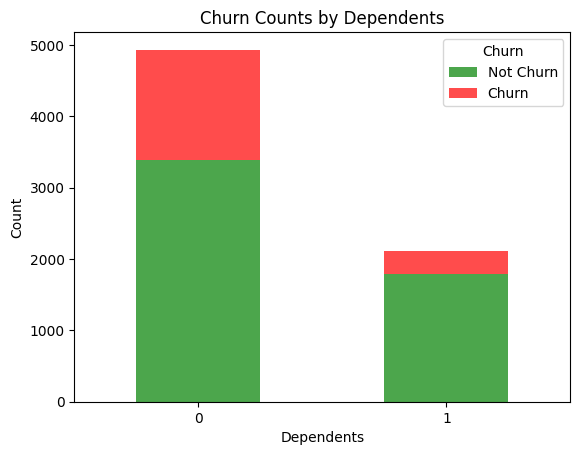

<Figure size 1000x500 with 0 Axes>

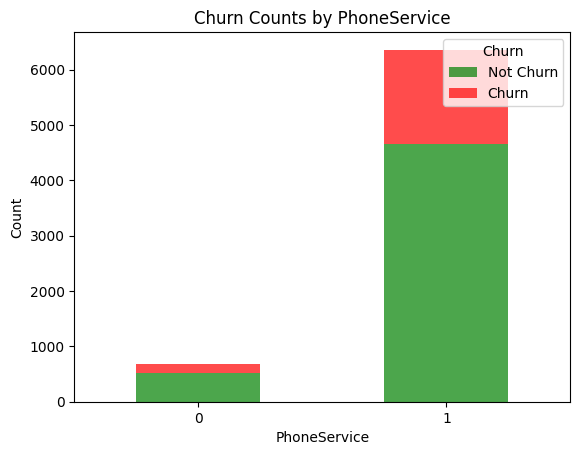

<Figure size 1000x500 with 0 Axes>

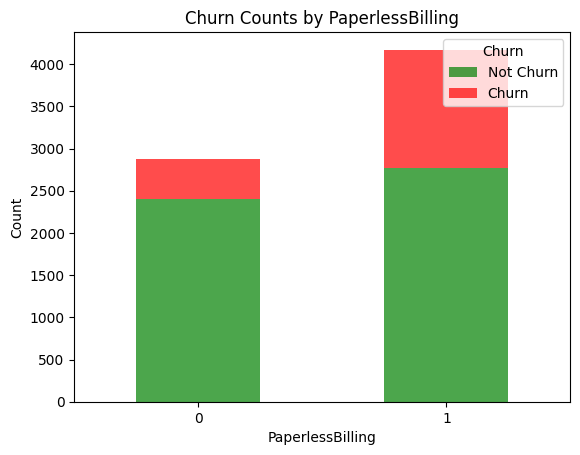

In [36]:
# List of binary categorical features.
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

# Plotted distribution and relationship with churn
for feature in categorical_features:
    # Calculate churn counts by category
    churn_counts = dataset.groupby([feature, 'Churn']).size().unstack()

    # Plot the bar chart
    plt.figure(figsize=(10, 5))
    churn_counts.plot(kind='bar', stacked=True, color=['green', 'red'], alpha=0.7)
    plt.title(f'Churn Counts by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.legend(title='Churn', labels=['Not Churn', 'Churn'], loc='upper right')
    plt.show()


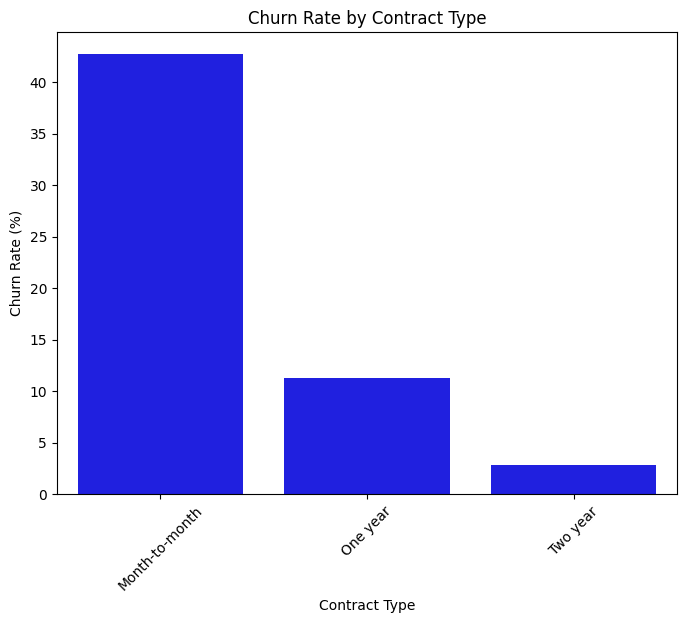

In [37]:
# Calculate churn rate by contract type
contract_churn_rate = data.groupby('Contract')['Churn'].mean() * 100

# Plot churn rate by contract type
plt.figure(figsize=(8, 6))
sns.barplot(x=contract_churn_rate.index, y=contract_churn_rate.values, color='blue')
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)
plt.show()

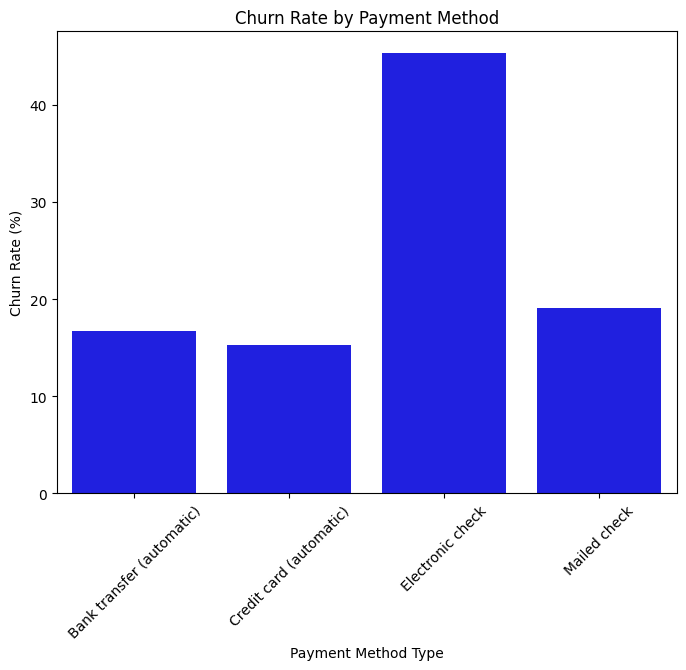

In [38]:
# Calculate churn rate by contract type
contract_churn_rate = data.groupby('PaymentMethod')['Churn'].mean() * 100

# Plot churn rate by contract type
plt.figure(figsize=(8, 6))
sns.barplot(x=contract_churn_rate.index, y=contract_churn_rate.values, color='blue')
plt.title('Churn Rate by Payment Method')
plt.xlabel('Payment Method Type')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)
plt.show()

### 4. Feature Engineering

I am planning to add 2 more feature as it will give more light namely - 

• Total_Services - It will reflect the number of services opted by the customers which suggests that if customer opter for as many services then it means they are happy with us and less chance for churning.<br>
• Monthly_Charges_per_Service - It reflects the average service charge that the customer is paying to the company on a monthly basis. If its less then mostly the churning is decreased.

In [39]:
# List of columns representing each service.
yes_service_columns = [
    'PhoneService', 
    'MultipleLines_Yes', 
    'InternetService_DSL', 
    'InternetService_Fiber optic', 
    'OnlineSecurity_Yes', 
    'OnlineBackup_Yes', 
    'DeviceProtection_Yes', 
    'TechSupport_Yes', 
    'StreamingTV_Yes', 
    'StreamingMovies_Yes'
]

# Created a new feature representing the total number of services subscribed to by each customer
dataset['TotalServices'] = dataset[yes_service_columns].sum(axis=1)

# Calculated the average monthly charge per service for each customer
dataset['MonthlyChargesPerService'] = dataset.apply(
    lambda row: row['MonthlyCharges'] / row['TotalServices'] if row['TotalServices'] > 0 else 0, 
    axis=1
)

print(dataset[['TotalServices', 'MonthlyChargesPerService']].head())


   TotalServices  MonthlyChargesPerService
0              2                   14.9250
1              4                   14.2375
2              4                   13.4625
3              4                   10.5750
4              2                   35.3500


Let's see the exact figure which gives somewhat light - 

In [40]:
customers_with_2_or_more_services = dataset[dataset['TotalServices'] >= 2]

# Count the number of customers who churned after availing 2 or more services
num_churned_after_2_or_more_services = customers_with_2_or_more_services[customers_with_2_or_more_services['Churn'] == 1].shape[0]

print("Number of customers who churned after availing 2 or more services:", num_churned_after_2_or_more_services)

Number of customers who churned after availing 2 or more services: 1731


### 5. Model Training and Evaluation

I would be using 3 models namely Logistic regression, random forest classifier and gradient boosting algorithm as all theses 3 are primarily used in classification problems and specially binary classification like Churn(1) or Not Churn(0).

Later I would perform a separate random forest classifier using hyperparatmeter tuning (GridSearchCV is the most common way for tuning the hyperparameters).

##### 5.1. Logistic Regression

In [41]:
# All necesary libraries are already imported.
# Defined the feature and the target variable.
X = dataset.drop(columns=['Churn'])
y = dataset['Churn']

# Splitted the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scaler.
scaler = StandardScaler()

# Then fitted the scaler on the training set and transform both the training and testing set.
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Then initialized the logistic regression model.
log_reg = LogisticRegression(random_state=42)

# Training themodel.
log_reg.fit(X_train_scaled, y_train)

# Making prediction with the model.
log_reg_y_pred = log_reg.predict(X_test_scaled)

# Finally evaluated the model performance.
log_reg_accuracy = accuracy_score(y_test, log_reg_y_pred)
log_reg_precision = precision_score(y_test, log_reg_y_pred)
log_reg_recall = recall_score(y_test, log_reg_y_pred)
log_reg_f1 = f1_score(y_test, log_reg_y_pred)

print("Logistic Regression- Accuracy:", log_reg_accuracy)
print("Logistic Regression- Precision:", log_reg_precision)
print("Logistic Regression- Recall:", log_reg_recall)
print("Logistic Regression- F1 Score:", log_reg_f1)


Logistic Regression- Accuracy: 0.8168914123491838
Logistic Regression- Precision: 0.676923076923077
Logistic Regression- Recall: 0.5898123324396782
Logistic Regression- F1 Score: 0.6303724928366762


• <u>Strength</u>: Logistic regression shows the highest accuracy and F1 score among the models, indicating a balanced performance in terms of precision and recall.<br>
• <u>Weakness</u>: The recall is lower compared to precision suggesting that the model could miss some churned customers.

##### 5.2. Gradient Boosting Classifier

In [42]:
# All necesary libraries are already imported.
# Defined the feature and the target variable.
X = dataset.drop(columns=['Churn'])
y = dataset['Churn']

# Splitted the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialized the scaler.
scaler = StandardScaler()

# Fitted the scaler on the training set and transform both the training and testing sets.
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Then initialize the gradient boosting model.
gb_model = GradientBoostingClassifier(random_state=42)

# Trained the model.
gb_model.fit(X_train_scaled, y_train)

# Made predictions with the  model.
gb_y_pred = gb_model.predict(X_test_scaled)

# At last evvaluated the gradient boosting model.
gb_accuracy = accuracy_score(y_test, gb_y_pred)
gb_precision = precision_score(y_test, gb_y_pred)
gb_recall = recall_score(y_test, gb_y_pred)
gb_f1 = f1_score(y_test, gb_y_pred)

print("Gradient Boosting - Accuracy:", gb_accuracy)
print("Gradient Boosting - Precision:", gb_precision)
print("Gradient Boosting - Recall:", gb_recall)
print("Gradient Boosting - F1 Score:", gb_f1)


Gradient Boosting - Accuracy: 0.808374733853797
Gradient Boosting - Precision: 0.6769759450171822
Gradient Boosting - Recall: 0.5281501340482574
Gradient Boosting - F1 Score: 0.5933734939759037


• <u>Strength</u>: Gradient boosting offers a good balance between precision and recall, though slightly lower than logistic regression in overall metrics.<br>
• <u>Weakness</u>: The recall is slightly lower than precision, indicating some room for improvement in identifying churned customers.

##### 5.3. Random Forest Classifier

In [43]:
# All necesary libraries are already imported.
# Define the feature and the target variable.
X = dataset.drop(columns=['Churn'])
y = dataset['Churn']

# Splitted the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialized the scaler.
scaler = StandardScaler()

# Fitteed the scaler on the training set and transform both the training and testing sets.
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Then initialized the random forest model.
rf_model = RandomForestClassifier(random_state=42)

# Trained the random forest model.
rf_model.fit(X_train_scaled, y_train)

# Making predictions with the model.
rf_y_pred = rf_model.predict(X_test_scaled)

# Finally evaluated the performance of model.
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred)
rf_recall = recall_score(y_test, rf_y_pred)
rf_f1 = f1_score(y_test, rf_y_pred)

print("Random Forest - Accuracy:", rf_accuracy)
print("Random Forest - Precision:", rf_precision)
print("Random Forest - Recall:", rf_recall)
print("Random Forest - F1 Score:", rf_f1)


Random Forest - Accuracy: 0.7899219304471257
Random Forest - Precision: 0.64
Random Forest - Recall: 0.4718498659517426
Random Forest - F1 Score: 0.5432098765432098


• <u>Strength</u>: Random forest provides a robust model with decent precision but suffers from a lower recall leading to a lower F1 score.<br>
• <u>Weakness</u>: Recall is the weakest among the three modelsmeaning it misses large number of churned customers.

##### 5.4. Random Forest Classifier (Hyperparameter Tuning)

In [44]:
# Defined the feature and the target variable.
X = dataset.drop(columns=['Churn'])
y = dataset['Churn']

# Splitted the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defined the parameter grid for hyperparameter tuning.
param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [None, 10, 20],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]  
}

# Then initialized Random Forest classifier.
rf_classifier = RandomForestClassifier(random_state=42)

# Also initialized grid search cross-validation.
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='f1')

# Performed grid search cross-validation.
grid_search.fit(X_train, y_train)

# Then got the best hyperparameters.
best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)

# Made predictions with the best model.
tuned_model = grid_search.best_estimator_
tuned_model_y_pred = tuned_model.predict(X_test)

# Evaluated the best model performance.
tuned_model_accuracy = accuracy_score(y_test, tuned_model_y_pred)
tuned_model_precision = precision_score(y_test, tuned_model_y_pred)
tuned_model_recall = recall_score(y_test, tuned_model_y_pred)
tuned_model_f1 = f1_score(y_test, tuned_model_y_pred)

print("Best Model - Accuracy:", tuned_model_accuracy)
print("Best Model - Precision:", tuned_model_precision)
print("Best Model - Recall:", tuned_model_recall)
print("Best Model - F1 Score:", tuned_model_f1)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best Model - Accuracy: 0.8097941802696949
Best Model - Precision: 0.6804123711340206
Best Model - Recall: 0.5308310991957105
Best Model - F1 Score: 0.5963855421686747


• <u>Strength</u>: The tuned random forest shows a more balanced performance and surpasses the base random forest model.<br>
• <u>Weakness</u>: Even after improvement, recall remains a challenge.

<u><i> Final Observation</i></u>

• Logistic regression emerges as the best performer in terms of accuracy and F1 score, making it the most reliable model for churn prediction in this analysis. However, there is a trade-off between precision and recall, indicating the potential need for further optimization or combining models to improve recall rates.<br>

• The gradient boosting and tuned random forest models are also good alternatives.

<font color= "red">************************************************************COMPLETED************************************************************</font>